# CHALLENGE: Advanced Regression 
Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

- Vanilla logistic regression
- Ridge logistic regression
- Lasso logistic regression

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, Ridge

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
sns.set_style('white')

In [2]:
crime_raw = pd.read_csv('crime_table.csv')
crime_raw.head()

,city,population,violent_crime,murder_nnm,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,rape,robbery_wins,murder_wins
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,0.0,0.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,227.0,526.0,4090.0,705.0,3243.0,142.0,0.0,30.0,39.0,8.0
4,Albion Village,6388.0,23.0,0.0,4.0,16.0,223.0,53.0,165.0,5.0,0.0,3.0,4.0,0.0


In [3]:
# Sum all the crime columns
crime_raw['total_crimes'] = crime_raw.iloc[:, 2:].sum(axis=1)

In [4]:
crime_raw.describe()

,population,violent_crime,murder_nnm,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,rape,robbery_wins,murder_wins,total_crimes
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,14313.328488,32.625000,0.290698,10.348837,20.191860,304.770349,50.052326,245.703488,9.014535,0.468023,1.793605,5.360465,0.290698,680.909884
std,20175.227446,101.125108,1.131229,35.993607,61.662283,514.873550,99.715412,406.100706,23.466428,1.851363,4.246194,9.957534,1.131229,1204.556655
min,526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2983.250000,2.000000,0.000000,0.000000,1.000000,39.000000,6.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000
50%,7106.000000,6.000000,0.000000,1.000000,4.000000,111.500000,17.000000,93.500000,2.000000,0.000000,0.000000,1.000000,0.000000,241.000000
75%,17889.250000,21.000000,0.000000,5.000000,13.250000,334.750000,50.000000,275.500000,7.000000,0.000000,2.000000,5.000000,0.000000,713.500000
max,199134.000000,1036.000000,10.000000,390.000000,615.000000,4090.000000,769.000000,3243.000000,236.000000,22.000000,31.000000,39.000000,10.000000,9809.000000


In [5]:
crime_raw.head()

,city,population,violent_crime,murder_nnm,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,rape,robbery_wins,murder_wins,total_crimes
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,24.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,0.0,0.0,0.0,54.0
2,Akron Village,2846.0,3.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,38.0
3,Albany,97956.0,791.0,8.0,227.0,526.0,4090.0,705.0,3243.0,142.0,0.0,30.0,39.0,8.0,9809.0
4,Albion Village,6388.0,23.0,0.0,4.0,16.0,223.0,53.0,165.0,5.0,0.0,3.0,4.0,0.0,496.0


In [6]:
crime_raw[crime_raw > 0].count()

city                   344
population             344
violent_crime          293
murder_nnm              45
robbery                205
aggravated_assault     278
property_crime         338
burglary               323
larceny_theft          337
motor_vehicle_theft    251
arson                   52
rape                   140
robbery_wins           205
murder_wins             45
total_crimes           338
dtype: int64

Robbery and rape are crimes that take up almost half of the crimes (ie. crimes that happen in at least half of cities). So I chose robbery as a classification outcome as an attempt to make it more difficult on the model to classify than other crime variables.

***Creating a binary outcome variable***

In [7]:
# find the crimes that are more than 50% of all crime per city ( greater than 47.6% of crime)
# fif = crime_raw['total_crimes'] / 2.1
# crime_raw['bin_prop_crime'] = np.where(crime_raw['property_crime']>=fif, 
#          1, 0)
# high crime = 1
# low crime = 0

In [8]:
crime_raw['bin_robbery'] = np.where(crime_raw['robbery']>0, 
         1, 0)

In [9]:
# (crime_raw['bin_prop_crime'] == yes).sum()

crime_raw['bin_robbery'].value_counts()

1    205
0    139
Name: bin_robbery, dtype: int64

I chose to look at where property crime was more than 48% of the crime to make the number of yes's and no's close, making it harder for the model to find the pattern.

In [10]:
crime_feats = crime_raw.drop(['robbery'], axis=1)
crime_feats.rename(columns={'murder_nnm':'murder', 'aggravated_assault': 'assault', 'larceny_theft': 'larceny',
                    'motor_vehicle_theft': 'vehicle', 'property_crime': 'property'}, inplace=True)
crime_feats.head()

,city,population,violent_crime,murder,assault,property,burglary,larceny,vehicle,arson,rape,robbery_wins,murder_wins,total_crimes,bin_robbery
0,Adams Village,1861.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,24.0,0
1,Addison Town and Village,2577.0,3.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,0.0,0.0,0.0,54.0,0
2,Akron Village,2846.0,3.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,38.0,0
3,Albany,97956.0,791.0,8.0,526.0,4090.0,705.0,3243.0,142.0,0.0,30.0,39.0,8.0,9809.0,1
4,Albion Village,6388.0,23.0,0.0,16.0,223.0,53.0,165.0,5.0,0.0,3.0,4.0,0.0,496.0,1


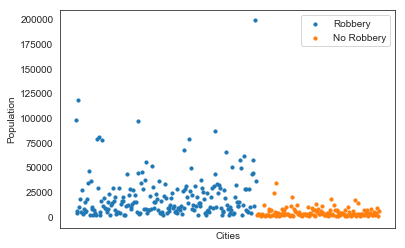

In [11]:
# X = feature values, all the columns except the last column
X = crime_feats.iloc[:, :-1]

# y = target values, last column of the data frame
Y = crime_feats.iloc[:, -1]

# filter out the cities with high property crime
robbery = crime_feats.loc[Y == 1]

# filter out the cities with low property crime
no_robbery = crime_feats.loc[Y == 0]

# plots
plt.scatter(robbery.iloc[:, 0], robbery.iloc[:, 1], s=10, label='Robbery')
plt.scatter(no_robbery.iloc[:, 0], no_robbery.iloc[:, 1], s=10, label='No Robbery')
plt.xlabel('Cities')
plt.ylabel('Population')
plt.xticks([])
plt.legend()
plt.show()

In [12]:
# crime table with crime totals and robbery made into a binary target
# crime_feats.to_csv('crime_feats_2013rob.csv')

/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


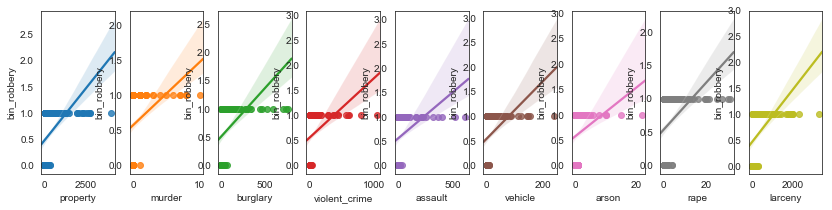

In [13]:
# Set variables
X_plot = ['property', 'murder', 'burglary', 'violent_crime', 'assault', 'vehicle', 'arson', 'rape', 'larceny']
Y_plot = 'bin_robbery'

# Define the scatterplot function
def plot_scat(frame, X, Y):
    fig, axes = plt.subplots(1, len(X), figsize=(14,3))
    for var in X:
        idx = X.index(var)
        sns.regplot(y=frame[Y], x=frame[var], ax=axes[idx])

plot_scat(crime_feats, X_plot, Y_plot)

In [14]:
crime_feats.corr()['bin_robbery'].sort_values(ascending=False)

bin_robbery      1.000000
robbery_wins     0.443929
larceny          0.418991
property         0.410145
population       0.398405
total_crimes     0.395808
burglary         0.345329
rape             0.309208
vehicle          0.280629
violent_crime    0.244455
assault          0.237419
murder_wins      0.206667
murder           0.206667
arson            0.179627
Name: bin_robbery, dtype: float64

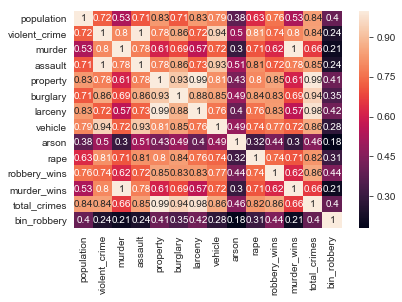

In [15]:
sns.heatmap(crime_feats.corr(), annot=True)
plt.show()

Murder and Arson have the least correlation to if a robbery occured, and to each other

In [16]:
crime_feats[(crime_feats["arson"] > 2) & (crime_feats["murder"] > 1)][
    ["city", "population", "arson", "murder"]]

,city,population,arson,murder
208,Newburgh,28571.0,15.0,5.0
216,Niagara Falls,49574.0,22.0,3.0
273,Rotterdam Town,29146.0,4.0,2.0
342,Yonkers,199134.0,10.0,6.0


I'll wait to remove these 4 cities that might be causeing some skewing of the data

In [17]:
# Declare predictors.
X_statsmod = crime_feats[['arson', 'murder', 'vehicle', 'rape', 'burglary', 'population', 'property', 'larceny']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(crime_feats['bin_robbery'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.345717
         Iterations 27
                           Logit Regression Results                           
Dep. Variable:            bin_robbery   No. Observations:                  344
Model:                          Logit   Df Residuals:                      336
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Jan 2019   Pseudo R-squ.:                  0.4875
Time:                        13:08:43   Log-Likelihood:                -118.93
converged:                       True   LL-Null:                       -232.07
                                        LLR p-value:                 3.047e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
arson         -0.2109      0.440     -0.479      0.632      -1.074       0.652
murder         1.3615      1

/Users/research/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


By looking at the coefficients it seems that for every robbery there's one arson, and about 3 murders.

In [18]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression()
# X = feature values, those with low multicollinearity
# X = crime_feats.iloc[:, 1:-1] # all the columns except the first and last columns
X = crime_feats[['arson', 'murder', 'vehicle', 'rape', 'burglary', 'property', 'larceny']]
# y = target values, last column of the data frame
Y = crime_feats.iloc[:, -1]

# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by Robberies')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

Coefficients
[[-0.0584299   0.18688745  0.11478916 -0.05361926 -0.03228217  0.05046526
  -0.03204173]]
[-1.99503982]

 Accuracy by Robberies
bin_robbery    0    1
row_0                
0            121   36
1             18  169

 Percentage accuracy
0.8430232558139535


### Train/Test Logistic Regression

In [19]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression()
# X = feature values, all the columns except the first and last columns
# X = crime_feats.iloc[:, 1:-1]
X = crime_feats[['arson', 'murder', 'vehicle', 'rape', 'burglary', 'property', 'larceny']]
# y = target values, last column of the data frame
Y = crime_feats.iloc[:, -1]
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# fit training data to model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# test results and accuracy
y_pred = logreg.predict(X_test)
print('Percentage Accuracy: {:.2f}'.format(logreg.score(X_test, y_test)))

# confusion matrix
# from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# precision recall f-scores
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Percentage Accuracy: 0.82
[[34  3]
 [16 51]]
             precision    recall  f1-score   support

          0       0.68      0.92      0.78        37
          1       0.94      0.76      0.84        67

avg / total       0.85      0.82      0.82       104



Using all features seems to help with normal linear regression. 

## Ridge Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
# Fit the model with GSCV
ridge_regressor.fit(X_train, y_train)

/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.692376e-18
  overwrite_a=True).T
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.856595e-17
  overwrite_a=True).T
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.009884e-17
  overwrite_a=True).T
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition numbe

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [22]:
predictions = ridge_regressor.predict(X_test)
print('\nBest Parameters:')
print(ridge_regressor.best_params_)
print('\nMSE:')
print(ridge_regressor.best_score_)


Best Parameters:
{'alpha': 20}

MSE:
-0.20832971768545197


In [23]:
ridgeregr = RidgeClassifier(alpha=0.01, fit_intercept=True) 
ridgeregr.fit(X_train, y_train)
predictions = ridgeregr.predict(X_test)
print(classification_report(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
print('\nR-squared:')
print(ridgeregr.score(X_test, y_test))
print('\nIntercepts:')
print(ridgeregr.coef_)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        49
          1       0.53      1.00      0.69        55

avg / total       0.28      0.53      0.37       104


R-squared:
0.5288461538461539

Intercepts:
[[ 0.02315694 -0.01494554 -0.00175621  0.01647527 -0.0006519  -0.00065106
   0.00175705]]


/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
# Change the alpha to the best found by GridSearch
ridgeregr = RidgeClassifier(alpha=20, fit_intercept=True) 
ridgeregr.fit(X_train, y_train)
predictions = ridgeregr.predict(X_test)
print(classification_report(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
print('\nR-squared:')
print(ridgeregr.score(X_test, y_test))
print('\nIntercepts:')
print(ridgeregr.coef_)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        49
          1       0.53      1.00      0.69        55

avg / total       0.28      0.53      0.37       104


R-squared:
0.5288461538461539

Intercepts:
[[ 0.02251839 -0.01308836 -0.00177874  0.01584976 -0.0006346  -0.00065321
   0.00176012]]


/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The score slightly improved using an alpha of 20, but overall this still performed worse than vanilla logistic regression (no train/test/split).

## Lasso Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
lass = Lasso(alpha=.0001)
lassfit = lass.fit(X_train, y_train)
predictions = lassfit.predict(X_test)
#print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print('\nR-squared:')
print(lass.score(X_test, y_test))
print('\nIntercepts:')
print(lass.coef_)


R-squared:
-0.0034976383350231455

Intercepts:
[-0.00267427  0.02352958 -0.00297315  0.01185099 -0.00173766  0.00063307
  0.00023699]


In [26]:
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv=5)
# Fit the model with GSCV
lasso_regressor.fit(X_train, y_train)

/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [27]:
l_predictions = lasso_regressor.predict(X_test)
print('\nBest Parameters:')
print(lasso_regressor.best_params_)
print('\nMSE:')
print(lasso_regressor.best_score_)


Best Parameters:
{'alpha': 1}

MSE:
-0.19461357790792283


In [28]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.01)
lassfit = lass.fit(X_train, y_train)
print('R² for the model with few features:')
print(lass.score(X_train, y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.22453584425986362

Parameter estimates for the model with few features:
[-0.00000000e+00  6.21792578e-03 -2.47694560e-03  1.19824341e-02
 -1.68896628e-03  6.19347066e-04  2.37277681e-04  4.32500788e-01]


After re-runing the lasso regressor with an alpha of 0.01 the R² score improved, but overall the score is horrible and worse than both logistic and ridge regressions.